# **Spotify songs analysis - last 10 years in numbers**

### Spotify is one of the most popular music platforms all over the world and here we'll make a brief analysis, focusing on the most popular songs. Let's find out what the people like !

This is how the analysis will be performed:

1.   Data preparation & cleaning
2.   Exploratory analysis and visualization
3.   Asking and answering questions
4.   Personal conclusions
5.   References and future work





In [2]:
import jovian
import pandas as pd
import numpy as np

# Project name
project='songs-analysis-final-project'

### **Initial raw data**
> This is the initial dataset we download from Kaggle, which includes data starting the year of 1921. I'm not sure if this data, being so old, would be really accurate and relevant.





In [ ]:
data_songs_raw_df = pd.read_csv('data-songs.csv')

In [ ]:
data_songs_raw_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [ ]:
# General raw dataframe info
data_songs_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

## **1. Data preparation & cleaning**
> This raw data contains values and columns, that probably will not be really useful for our analysis. That's why we need to clean and select only the most relevant information.



#### 1.1 Only the last 10 years will be analyzed

-- This probably would make the data more accurate, since the technology to rate the songs has been improved the last 10 years

In [ ]:
data_songs_df = data_songs_raw_df.drop(data_songs_raw_df[data_songs_raw_df.year < 2010].index)

In [ ]:
# Dataframe with the relevant data for this analysis
data_songs_df.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

#### 1.2 Not all columns will be considered for this analysis.
-- We'll select only some columns using a list of column names

In [ ]:
columns_selection = ['id', 'name', 'popularity', 'release_date', 'year', 'duration_ms', 'artists', 'danceability', 'energy', 'explicit', 'speechiness']
data_songs_df = data_songs_df[columns_selection]
data_songs_df.columns

Index(['id', 'name', 'popularity', 'release_date', 'year', 'duration_ms',
       'artists', 'danceability', 'energy', 'explicit', 'speechiness'],
      dtype='object')

#### 1.3 Editing some columns. E.g. 'name', 'artists', 'duration_ms' and 'release_date'

##### Column 'name'

> It should be better to set to lowercase the name of the songs, for easier string manipulation



In [ ]:
data_songs_df['name'] = data_songs_df.name.str.lower()

##### Column 'artists'


> This column comes a list, would be easier to manipulate as a comma separated string. We'll use a lambda function to format it.



In [ ]:
data_songs_df['artists'] = data_songs_df.artists.apply(lambda s: str(s).replace("'", '').strip('[]'))

##### Column 'duration_ms'

> duration in milliseconds would be better to display it in minutes, such  transformation can be achieved applying a lambda function to the column.



In [ ]:
import math
data_songs_df['duration_mins'] = data_songs_df.duration_ms.apply(lambda ms: round((ms / 60000), 2))

# The column 'duration_ms' won't be needed anymore, by using 'drop' method, we get rid of the column.
# by adding the parameter 'inplace=True', won't return a copy so it will be modified on the Dataframe itself.
data_songs_df.drop(columns=['duration_ms'], inplace=True)

##### Column 'release_month'


> Another column probably helpful would be the month when the song was released, using the Pandas method *DatetimeIndex*



In [ ]:
data_songs_df['release_month'] = pd.DatetimeIndex(data_songs_df['release_date']).month

##### This is how the dataframe looks now.


> Sample of 5 songs to verify the new columns



In [ ]:
data_songs_df.sample(5)

,id,name,popularity,release_date,year,artists,danceability,energy,explicit,speechiness,duration_mins,release_month
16137,3CyCjgTHFzqucmECajq8QA,dun dun,75,2020-02-03,2020,EVERGLOW,0.692,0.881,0,0.0461,3.20,2
152290,5JnrCMAVY9tIuglIZba758,me pegó la gana,57,2013-09-30,2013,Traviezoz de la Zierra,0.578,0.514,0,0.0401,2.81,9
125886,54yT3t8hSaJUvdHer3ZaB1,alexis,67,2017-10-08,2017,Joey Trap,0.839,0.539,1,0.0926,1.38,10
161200,4fhKaRCxbWXA3BwAr3Zxjx,david ashley parker from powder springs,63,2018-03-16,2018,Travis Denning,0.555,0.895,0,0.0472,3.50,3
160597,2JtL0a3NHcGkFQ7kfDLKUT,swing lo magellan,51,2012-07-10,2012,Dirty Projectors,0.738,0.366,0,0.0324,2.63,7


In [ ]:
# Now we can see clearer and useful info to be used for our analysis. Here some statistics using the 'describe' method.
data_songs_df.describe()

,popularity,year,danceability,energy,explicit,speechiness,duration_mins,release_month
count,21656.000000,21656.000000,21656.000000,21656.000000,21656.000000,21656.000000,21656.000000,21656.000000
mean,59.850526,2014.942233,0.605048,0.631091,0.302734,0.104421,3.706779,6.034124
std,10.537460,3.142110,0.170475,0.217466,0.459452,0.110202,1.424352,3.589228
min,0.000000,2010.000000,0.000000,0.000020,0.000000,0.000000,0.510000,1.000000
25%,53.000000,2012.000000,0.502000,0.500000,0.000000,0.037200,3.120000,3.000000
50%,60.000000,2015.000000,0.618000,0.658000,0.000000,0.054900,3.580000,6.000000
75%,66.000000,2018.000000,0.730000,0.798000,1.000000,0.123000,4.110000,9.000000
max,100.000000,2020.000000,0.986000,1.000000,1.000000,0.950000,90.060000,12.000000


In [ ]:
data_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21656 entries, 7054 to 169908
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21656 non-null  object 
 1   name           21656 non-null  object 
 2   popularity     21656 non-null  int64  
 3   release_date   21656 non-null  object 
 4   year           21656 non-null  int64  
 5   artists        21656 non-null  object 
 6   danceability   21656 non-null  float64
 7   energy         21656 non-null  float64
 8   explicit       21656 non-null  int64  
 9   speechiness    21656 non-null  float64
 10  duration_mins  21656 non-null  float64
 11  release_month  21656 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 2.1+ MB


In [ ]:
# Now write the new dataframe to a CSV file to use it for the analysis.
data_songs_df.to_csv('data_songs_cleaned.csv')


In [ ]:
# Save our progress
jovian.commit(project=project, files=['data_songs_cleaned.csv'])

## **2. Exploratory analysis and visualization**

> Let's analyze some interesting characteristics found in this dataset like popularity, danceability and explicit content.



In [ ]:
# In case seaborn and matplotlib need to be installed
!pip install seaborn
!pip install matplotlib

In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
data_songs_df = pd.read_csv('data_songs_cleaned.csv', index_col=0)

#### 2.1 Popularity

> Let's look at the 10 most popular songs this year (2020)



In [ ]:
popular_songs_2020 = data_songs_df[data_songs_df.year == 2020][['name','artists', 'year', 'popularity']].sort_values('popularity', ascending=False).head(10)
popular_songs_2020

,name,artists,year,popularity
11858,blinding lights,The Weeknd,2020,100
11856,rockstar (feat. roddy ricch),"DaBaby, Roddy Ricch",2020,99
11865,death bed (coffee for your head) (feat. beabad...,"Powfu, beabadoobee",2020,97
11857,the scotts,"THE SCOTTS, Travis Scott, Kid Cudi",2020,96
11862,toosie slide,Drake,2020,95
11859,party girl,StaySolidRocky,2020,94
11867,gooba,6ix9ine,2020,94
11868,rain on me (with ariana grande),"Lady Gaga, Ariana Grande",2020,94
11869,stuck with u (with justin bieber),"Ariana Grande, Justin Bieber",2020,94
11860,whats poppin,Jack Harlow,2020,92


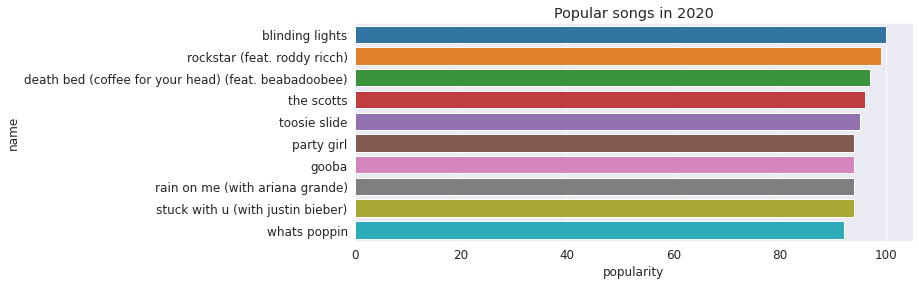

In [ ]:
plt.figure(figsize=(10,4))
plt.title('Popular songs in 2020')
sns.barplot(y=popular_songs_2020.name, x=popular_songs_2020.popularity);

In [ ]:
# Save our progress
jovian.commit(project=project)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "hada-garcia/songs-analysis-final-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/hada-garcia/songs-analysis-final-project


'https://jovian.ml/hada-garcia/songs-analysis-final-project'

#### 2.2 Danceability and energy

> Let's see which are the top 10 danceable songs of all years



In [ ]:
dance_songs_columns = ['artists', 'danceability', 'energy', 'duration_mins', 'name', 'year', 'id']
dance_songs = data_songs_df[dance_songs_columns].sort_values('danceability', ascending=False).head(10)
dance_songs

,artists,danceability,energy,duration_mins,name,year,id
16516,"Pitbull, Trina, Young Bo",0.986,0.597,3.83,go girl,2012,1MgM0WDaoQ2A3bnIQTR6ty
10471,XXXTENTACION,0.979,0.401,2.52,up like an insomniac - freestyle,2017,5UJ3N25ukIruG4Do8RDHra
17173,Ambjaay,0.978,0.477,1.82,uno,2019,3AEgic4yp82NxMWUjHtxnO
2988,"Quality Control, Lil Yachty, Quavo, Offset",0.977,0.303,2.42,menace,2017,0CjHqLvr4EdjBJ0XiKtbCI
3882,"Juicy J, Wiz Khalifa, R. City",0.977,0.334,4.48,for everybody (feat. wiz khalifa & r. city),2015,1qJjofprTOxvqkIAdDixaP
7636,"Lil Keed, Gunna",0.975,0.535,3.80,fox 5 (feat. gunna),2020,0fo53bqWHuxcAsi28m51tx
12906,"Young Thug, Lil Baby",0.974,0.596,2.48,bad bad bad (feat. lil baby),2019,1GeNui6m825V8jP4uKiIaH
15606,Xavier Wulf,0.973,0.446,2.26,psycho pass,2014,3kZAm2TC74lBJFPDoV40Qc
6569,"deadmau5, Wolfgang Gartner",0.973,0.468,6.25,animal rights,2010,5vHhUaBToEioiSu3RC1sbL
8473,Roddy Ricch,0.971,0.614,2.83,feed tha streets 2 (intro),2018,3kgQ1kJC1WkuYVJuNJHPGA


##### Relationship between the energy and danceability in a song. The more energetic the song is, the better the chances is a danceable song.

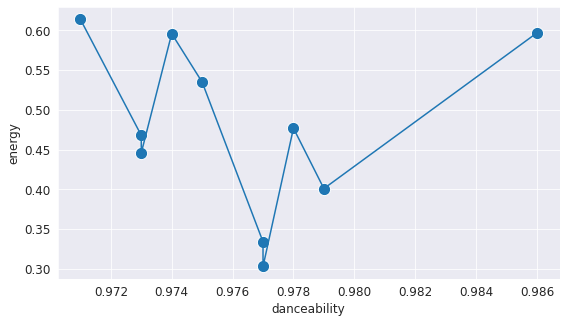

In [ ]:
sns.scatterplot(x=dance_songs.danceability, y=dance_songs.energy, s=150);

plt.plot(dance_songs.danceability, dance_songs.energy);

##### Although, is not directly related, since the most energetic song is also not very danceable.

[Roddy Rich - feed tha streets 2 (intro)](https://open.spotify.com/track/3kgQ1kJC1WkuYVJuNJHPGA)

In [ ]:
dance_songs.loc[dance_songs.energy > 0.60].sort_values('energy', ascending=False)

,artists,danceability,energy,duration_mins,name,year
8473,Roddy Ricch,0.971,0.614,2.83,feed tha streets 2 (intro),2018


##### The most danceable song is [Pitbull, Trina, Young Bo - go girl](https://open.spotify.com/track/1MgM0WDaoQ2A3bnIQTR6ty)

> *Although I don't really understand the metrics, since I'm a latina and for me, this is not a song that I feel like dancing with :P*



In [ ]:
dance_songs.sort_values('danceability', ascending=False).head(3)

,artists,danceability,energy,duration_mins,name,year,id
16516,"Pitbull, Trina, Young Bo",0.986,0.597,3.83,go girl,2012,1MgM0WDaoQ2A3bnIQTR6ty
10471,XXXTENTACION,0.979,0.401,2.52,up like an insomniac - freestyle,2017,5UJ3N25ukIruG4Do8RDHra
17173,Ambjaay,0.978,0.477,1.82,uno,2019,3AEgic4yp82NxMWUjHtxnO


#### 2.3 Explicit content

> Songs with explicit content which could be considered offensive or unsuitable for children: strong language (one word is already enough); references to violence, physical, or mental abuse; ... discriminatory language



In [ ]:
explicit_songs = data_songs_df['explicit'].value_counts()
explicit_songs

0    15100
1     6556
Name: explicit, dtype: int64

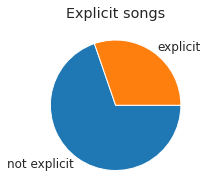

In [ ]:
plt.figure(figsize=(3,3))
plt.title('Explicit songs')
plt.pie(explicit_songs, labels=['not explicit', 'explicit'], counterclock=False);

In [ ]:
# Save our progress
jovian.commit(project=project)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/hada-garcia/songs-analysis-final-project


'https://jovian.ml/hada-garcia/songs-analysis-final-project'

## **3. Asking and answering questions**


> Now let's make some questions related to our data



#### **Q1: How does it look with the explicit content over the years?**


> We'll analyze the tendency to use explicit content over the years based only on this dataset, although this could be worth it to be analyzed independently using different datasets.



In [ ]:
explicit_songs = data_songs_df.groupby('year')['explicit'].sum()
explicit_songs

year
2010    301
2011    358
2012    404
2013    504
2014    458
2015    528
2016    656
2017    698
2018    936
2019    848
2020    865
Name: explicit, dtype: int64

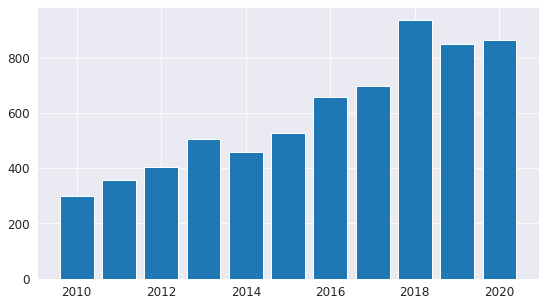

In [ ]:
years = range(2010, 2021)
plt.bar(years, explicit_songs);

In [ ]:
last_month_2020 = data_songs_df[data_songs_df.year == 2020].sort_values('release_month', ascending=False).head(1)
print('Last released songs on 2020 are in the {}th month'.format(list(last_month_2020.release_month)[0]))

Last released songs on 2020 are in the 6th month


*It seems like over the years, the explicit content is more present on the songs. The year 2018 is the one with more explicit content songs, total of 936. We also must consider that the last month, where a song was released this year is June, it means only half year is considered. So, the count of explicit songs could be bigger than 2018*

#### **Q2: Comparison by year, which characteristics are more predominant?**

In [ ]:
relevant_columns_q2 = ['duration_mins', 'danceability', 'energy', 'explicit', 'speechiness', 'year']
songs_by_year = data_songs_df[relevant_columns_q2].groupby('year').mean()
songs_by_year

,duration_mins,danceability,energy,explicit,speechiness
year,,,,,
2010,4.059100,0.577811,0.693696,0.150500,0.086007
2011,3.943075,0.559822,0.671269,0.179000,0.089902
2012,4.042460,0.571695,0.669811,0.202000,0.083701
2013,3.992810,0.578874,0.656467,0.252000,0.097622
2014,3.865810,0.589574,0.653497,0.229000,0.084671
2015,3.745049,0.591008,0.633499,0.273433,0.095743
2016,3.656638,0.599976,0.592877,0.333164,0.107298
2017,3.489140,0.612286,0.586739,0.349000,0.111752
2018,3.348755,0.664930,0.590591,0.468000,0.128140


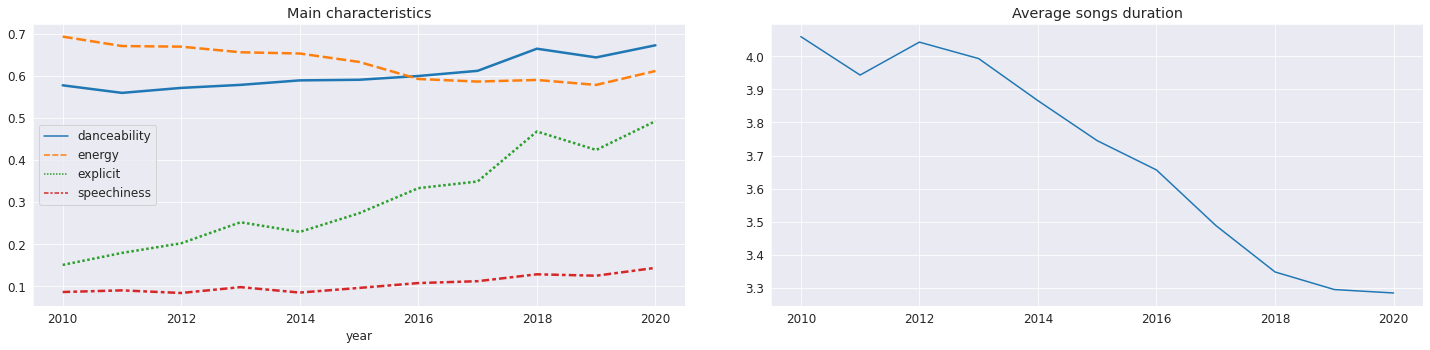

In [ ]:
# Using subplots we can define a grid of graphs
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(20,5))

plt1.set_title('Main characteristics')
sns.lineplot(data=songs_by_year[['danceability', 'energy', 'explicit', 'speechiness']], palette="tab10", linewidth=2.5, ax=plt1);

plt2.set_title('Average songs duration')
plt2.plot(songs_by_year.index, songs_by_year.duration_mins)

plt.tight_layout(pad=1, w_pad=5);

*Some conclusions on average per year: (Year 2020 info is not complete, thus the calculations might not be so accurate for this year)*


*   songs have a tendency to be shorter, with an average of 3.28 mins duration the last year (2020).
*   explicit content has increased the most the last 6 years.
*   the presence of spoken words in a song has increased.
*   is interesting that the energy has decreased since danceability has increased, would've thought they go together.


In [ ]:
# Save our progress
jovian.commit(project=project)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/hada-garcia/songs-analysis-final-project


'https://jovian.ml/hada-garcia/songs-analysis-final-project'

#### **Q3: How many songs in spanish contain romantic words on the title.**

> To achieve this I'll search by pattern with romantic words in spanish



In [ ]:
# Here we can play a bit with regular expresions. 
# \\b means we want to look for the specific words, otherwise the results will include words that contain partially for example the word 'amo'

relevant_columns_q3 = ['artists', 'name', 'popularity', 'year']
love_words_spanish = '\\b(?:amor|amar|amaré|amando|amé|amo|amas|querer|querida|querido|te quiero|me gustas|cariño)\\b';
love_songs_df = data_songs_df[relevant_columns_q3][data_songs_df.name.str.contains(love_words_spanish, regex=True)].sort_values('popularity', ascending=False)
love_songs_df


,artists,name,popularity,year
12923,Natanael Cano,amor tumbado,79,2019
2155,Christian Nodal,amor tóxico,76,2020
13839,Christian Nodal,adiós amor,74,2017
21492,La Adictiva Banda San José de Mesillas,el amor de mi vida,73,2019
19263,"Grupo Firme, Banda Coloso",el amor no fue pa´ mí - en vivo,73,2019
...,...,...,...,...
7755,Tierra Cali,maldito amor,44,2010
8682,Zacarias Ferreira,se marcho el amor,44,2010
5677,Axel,te voy a amar,43,2011
9825,Alacranes Musical,dame tu amor,41,2010


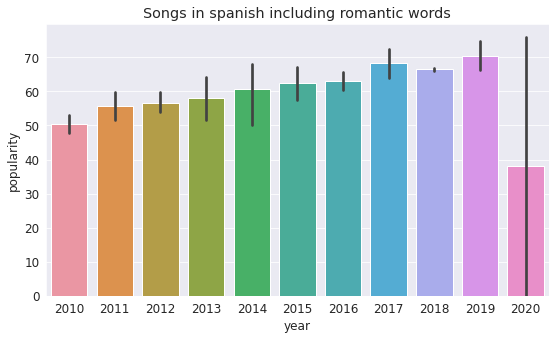

In [ ]:
plt.title('Songs in spanish including romantic words')
sns.barplot(x=love_songs_df.year, y=love_songs_df.popularity);

*This results don't reflect the sentiment on the songs, since we're only taking as argument the title of the song, it's just an interesting search, since it's very probable, that the songs will talk about love, since the title includes a romantic word, I was just curious about that ;)* <br>
*Specially latinos, tend to be quite romantic*

In [ ]:
# Save our progress
jovian.commit(project=project)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/hada-garcia/songs-analysis-final-project


'https://jovian.ml/hada-garcia/songs-analysis-final-project'

#### **Q4: To what genres belong the most pupular songs?**

In [ ]:
# Since we'll perform some dataframe manipulations, it's better to make a copy, to keep the original safe
songs_by_artist_cols = ['artists', 'popularity', 'name', 'id']
songs_by_artist = data_songs_df.copy()[songs_by_artist_cols]
songs_by_artist

,artists,popularity,name,id
7054,Tame Impala,48,expectation,4m3GHOgCNZMv0we7H9j8Y8
7055,Bring Me The Horizon,50,it never ends,0ZxZsjMMyLgjRV1XLWlIaS
7056,Daft Punk,48,solar sailer,0Jc2SfIHv63JNsUZpunh54
7057,TobyMac,48,city on our knees,5QZunYrvUrJs3Mzrjl7fKV
7058,Kenny Chesney,47,reality,0X0zDB7RqpWOIwCHGr2Whu
...,...,...,...,...
169904,"DripReport, Tyga",75,skechers (feat. tyga) - remix,4KppkflX7I3vJQk7urOJaS
169905,"Leon Bridges, Terrace Martin",64,sweeter (feat. terrace martin),1ehhGlTvjtHo2e4xJFB0SZ
169906,"Kygo, Oh Wonder",70,how would i know,52eycxprLhK3lPcRLbQiVk
169907,"Cash Cash, Andy Grammer",70,i found you,3wYOGJYD31sLRmBgCvWxa4


In [ ]:
# Read the dataset data_w_genres
relevant_columns_q4 = ['artists', 'genres'] # We don't need all the columns, only these 2
songs_by_genres = pd.read_csv('data_w_genres.csv')
songs_by_genres = songs_by_genres[relevant_columns_q4]

In [ ]:
# Let's look after one known artist to verify the genres
songs_by_genres[songs_by_genres.artists == 'Maluma']

,artists,genres
15287,Maluma,"['latin', 'reggaeton']"


In [ ]:
# Now merge both datasets by 'artists' column, to know the most popular genres
merged_songs = songs_by_artist.merge(songs_by_genres, on='artists')

In [ ]:
# merged_songs.info()
merged_songs_cleaned = merged_songs[merged_songs.genres != '[]']
merged_songs_cleaned.sort_values('popularity', ascending=False).head(10)

,artists,popularity,name,id,genres
1857,The Weeknd,100,blinding lights,0VjIjW4GlUZAMYd2vXMi3b,"['canadian contemporary r&b', 'canadian pop', ..."
793,Drake,95,toosie slide,127QTOFJsJQp5LbJbu3A1y,"['canadian hip hop', 'canadian pop', 'hip hop'..."
6329,Roddy Ricch,95,the box,0nbXyq5TXYPCO7pr3N8S4I,['melodic rap']
14954,6ix9ine,94,gooba,4NhDYoQTYCdWHTvlbGVgwo,['emo rap']
14944,Tones And I,94,dance monkey,2XU0oxnq2qxCpomAAuJY8K,['australian pop']
6079,Doja Cat,93,say so,3Dv1eDb0MEgF93GpLXlucZ,"['la indie', 'pop']"
6743,Dua Lipa,93,don't start now,6WrI0LAC5M1Rw2MnX2ZvEg,"['dance pop', 'pop', 'uk pop']"
6303,Surfaces,93,sunday best,1Cv1YLb4q0RzL6pybtaMLo,"['bedroom soul', 'pop']"
12465,Jack Harlow,92,whats poppin,1jaTQ3nqY3oAAYyCTbIvnM,"['deep underground hip hop', 'pop rap', 'rap',..."
4944,Arizona Zervas,92,roxanne,696DnlkuDOXcMAnKlTgXXK,['pop rap']


##### Doing some calculations over the genres, we can find out which are the most common genres.



In [ ]:
genres_series = merged_songs_cleaned.genres.apply(lambda s: str(s).replace("'", '').strip('[]'))
genres_series

In [ ]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

# Method borrowed from this notebook, with authorization given.
https://jovian.ml/aakashns/python-eda-stackoverflow-survey

# It takes a Series and returns a Dataframe where the values are boolean

In [ ]:
genres_df = split_multicolumn(genres_series)

In [ ]:
# Sample
genres_df.sample(5)

# There are 1700 columns, meaning we have 1700 different genres

,australian psych,neo-psychedelic,melodic metalcore,metalcore,uk metalcore,electro,filter house,ccm,christian alternative rock,christian hip hop,christian music,worship,contemporary country,country,country road,christian indie,tecnobanda,tejano,comic,indie pop rap,pop rap,banda,duranguense,grupera,norteno,regional mexican,alternative metal,pixie,pop punk,screamo,oklahoma country,christian rock,nu metal,post-grunge,rap rock,comedy,comic,bluegrass,neo-traditional bluegrass,new americana,...,dutch hip hop,pakistani hip hop,romanian pop,finnish edm,synth funk,belgian edm,post-hardcore,kingston on indie,nu-cumbia,uk alternative hip hop,sertanejo universitario,theme,nu disco,italian disco,"""childrens folk""",kids dance party,hands up,italo dance,lancaster pa indie,kirtan,christian indie,wonky,geek rock,zolo,australian metal,k-pop boy group,j-division,charlotte nc indie,pixie,connecticut hardcore,hardcore,kawaii future bass,hands up,nightcore,irish hip hop,london rap,swedish gangsta rap,dutch hip hop,dutch trap pop,ritmo kombina
2669,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9412,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15239,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##### Let's display the top 10, to compare againsts the top 10 more popular songs

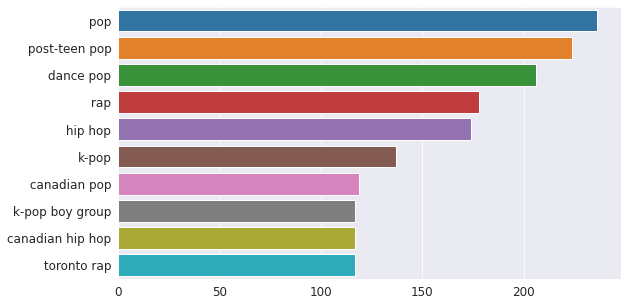

In [ ]:
genres_totals_top_10 = genres_df.sum().sort_values(ascending=False).head(10)
sns.barplot(x=genres_totals_top_10, y=genres_totals_top_10.index);

*Hip hop and rap seem to be the mosts popular genres the last 10 years. Here would be interesting for future work, to identify the most popular genres by country, I'm pretty sure the results would be very different ;)*

#### **Q5: What is the sentiment of the most popular songs?**

> This is a bonus question, since the data mentioned showed some interesting results about the explicit content. It has been increasing over the years and I would like to know if the sentiment analysis of the 10 most popular songs, using google cloud analysis API.

If you wonder why only the 10 most popular songs? The reason is, I would like to go over the lyrics, and this means a lot of unit requests (each unit request is 1,000 characters) to the google cloud Natural Language API and it has some costs, which are probably not too high, but we have to consider we are analyzing a dataset of 21656 entries.

Even if we analyze only the song's title (which is not the best option), it could be a significant cost.

* Here is the link to the natural language prices:
https://cloud.google.com/natural-language/pricing

* If you are interested on how to use this API, here is a jupyter notebook I wrote explaining how to use it, as well as some examples.
https://jovian.ml/hada-garcia/sentiment-analysis



In [4]:
# Reading the output CSV file from the notebook mentioned above:
songs_sentiment = pd.read_csv('songs_lyrics_sentiment.csv', index_col=0)
songs_sentiment

,id,name,popularity,release_date,year,artists,danceability,energy,explicit,speechiness,duration_mins,release_month,lyrics,sentiment
0,0VjIjW4GlUZAMYd2vXMi3b,blinding lights,100,2020-03-20,2020,The Weeknd,0.514,0.730,0,0.0598,3.33,3,I been on my own for long enough. Maybe you ca...,1
1,7ytR5pFWmSjzHJIeQkgog4,rockstar (feat. roddy ricch),99,2020-04-17,2020,"DaBaby, Roddy Ricch",0.746,0.690,1,0.1640,3.03,4,I pull up like. How you pull up Baby? How you ...,2
2,7eJMfftS33KTjuF7lTsMCx,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,2020,"Powfu, beabadoobee",0.726,0.431,0,0.1350,2.89,2,Don't stay awake for too long. Don't go to bed...,3
3,39Yp9wwQiSRIDOvrVg7mbk,the scotts,96,2020-04-24,2020,"THE SCOTTS, Travis Scott, Kid Cudi",0.716,0.537,1,0.0514,2.77,4,Let's go. We see the hype outside. Right from ...,3
4,62aP9fBQKYKxi7PDXwcUAS,ily (i love you baby) (feat. emilee),95,2019-11-26,2019,"Surf Mesa, Emilee",0.674,0.774,0,0.0892,2.94,11,I love you baby. And if it's quite all right I...,5
5,0nbXyq5TXYPCO7pr3N8S4I,the box,95,2019-12-06,2019,Roddy Ricch,0.896,0.586,1,0.0559,3.28,12,Pullin' out the coupe at the lot .Told 'em 'Fu...,2
6,4nK5YrxbMGZstTLbvj6Gxw,supalonely,95,2019-11-15,2019,"BENEE, Gus Dapperton",0.863,0.631,1,0.0534,3.72,11,I know I fucked up. I'm just a loser. Shouldn'...,1
7,127QTOFJsJQp5LbJbu3A1y,toosie slide,95,2020-04-03,2020,Drake,0.834,0.454,1,0.2010,4.12,4,Black leather gloves no sequins. Buckles on th...,2
8,2XU0oxnq2qxCpomAAuJY8K,dance monkey,94,2019-10-17,2019,Tones And I,0.824,0.588,0,0.0924,3.49,10,They say oh my god. I see the way you shine. T...,4
9,24ySl2hOPGCDcxBxFIqWBu,rain on me (with ariana grande),94,2020-05-22,2020,"Lady Gaga, Ariana Grande",0.672,0.855,0,0.0397,3.04,5,I didn't ask for a free ride. I only asked you...,1


##### Sentiment rate is defined as:

5 = Very positive </br>
4 = Positive </br>
3 = Neutral </br>
2 = Negative </br>
1 = Very negative </br>



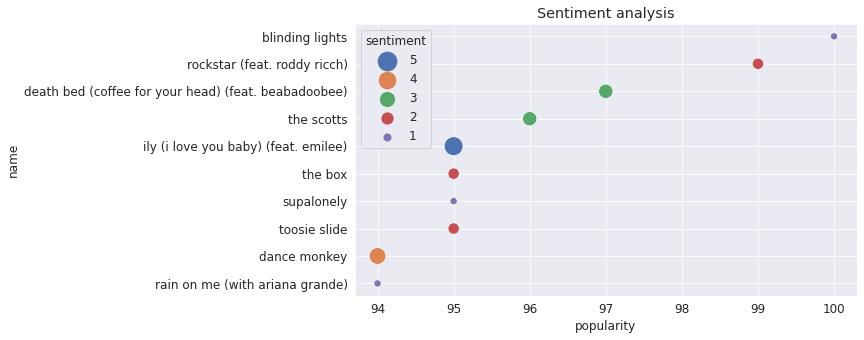

In [23]:
plt.title('Sentiment analysis')
sns.scatterplot(y=songs_sentiment.name, x=songs_sentiment.popularity, hue=songs_sentiment.sentiment, hue_order=[5,4,3,2,1], size=songs_sentiment.sentiment,
    sizes=(50, 350), palette='deep');

*The sentiment analysis was calculated using the song's lyrics, altough some results are VERY NEGATIVE, we need to consider also the explicit content.*

*E.g. the song "rain on me" was classified as very negative, the explicit content value for it is 0, which means the song is just too sad.*

*My conclusion is, sad songs are very popular, which is not bad, since it depends on the mood and people sometimes need this kind of songs. What I don't really like is the tendency of negative songs including explicit content, why are they so popular?*

## **4. Personal conclusions**

> After analyzing this public data, I noticed some tendencies to more explicit songs and genres, which personally are not my favorites.

> As I mentioned on previous sections, an approach by countries would give better results, since people is very different all around the world and by digging on information specific to a country, we could find very different results on the most popular songs and genres.





## **5. References and future work**

Datasets downloaded from: </br>
https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

Some interesting links: </br>
https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

https://seaborn.pydata.org/index.html

Future work: </br>
Some of the datasets will need to be merged with another datasets in order to get more accurate info. E.g. Explicit songs, would be interesting to analyze to what genres belong the most explicit songs. I would like to find out if 'reggaeton' would be one of them. </br>
Regarding the general characteristics like danceability, energy or speechiness, would be interesting to analyze deeper the relationship between them, from a more acustic point of view.


In [24]:
# Save our progress
jovian.commit(project=project)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/hada-garcia/songs-analysis-final-project


'https://jovian.ml/hada-garcia/songs-analysis-final-project'